In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [445]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [446]:
os.chdir("/content/drive/MyDrive/DATA SCIENCE & ANALYSIS/7_Heart_Disease_Prediction")

In [447]:
os.listdir()

['heart_attack_prediction_dataset.csv', 'Heart Disease Prediction.ipynb']

In [448]:
heart_attack_df = pd.read_csv("heart_attack_prediction_dataset.csv")

## **DATASET**

**Link Dataset:**

https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

**Column Descriptions:**
1. Patient ID - Unique identifier for each patient
2. Age - Age of the patient
3. Sex - Gender of the patient (Male/Female)
4. Cholesterol - Cholesterol levels of the patient
5. Blood Pressure - Blood pressure of the patient (systolic/diastolic)
6. Heart Rate - Heart rate of the patient
7. Diabetes - Whether the patient has diabetes (Yes/No)
8. Family History - Family history of heart-related problems (1: Yes, 0: No)
9. Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)
10. Obesity - Obesity status of the patient (1: Obese, 0: Not obese)
11. Alcohol Consumption - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
12.  Exercise Hours Per Week - Number of exercise hours per week
13. Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)
14. Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)
15. Medication Use - Medication usage by the patient (1: Yes, 0: No)
16. Stress Level - Stress level reported by the patient (1-10)
17. Sedentary Hours Per Day - Hours of sedentary activity per day
18. Income - Income level of the patient
19. BMI - Body Mass Index (BMI) of the patient
20. Triglycerides - Triglyceride levels of the patient
21. Physical Activity Days Per Week - Days of physical activity per week
22. Sleep Hours Per Day - Hours of sleep per day
23. Country - Country of the patient
24. Continent - Continent where the patient resides
25. Hemisphere - Hemisphere where the patient resides
26. Heart Attack Risk - Presence of heart attack risk (1: Yes, 0: No)

## **HYPOTHESES**

Sebelum melakukan analisis data, **saya menyusun beberapa hipotesis awal** untuk memahami faktor-faktor yang diduga berpengaruh terhadap risiko serangan jantung. Hipotesis ini digunakan sebagai dasar dalam proses eksplorasi dan pemodelan data.

**Hipotesis:**

1. Risiko penyakit jantung cenderung meningkat seiring bertambahnya usia.
2. Pria memiliki risiko serangan jantung yang lebih tinggi daripada perempuan.
3. Semakin tinggi kadar kolesterol, semakin tinggi pula risiko serangan jantung.
4. Tekanan darah tinggi (hipertensi) merupakan salah satu faktor utama yang meningkatkan risiko penyakit jantung.
5. Detak jantung per menit yang lebih tinggi berkaitan dengan peningkatan risiko serangan jantung.
6. Seseorang yang menderita diabetes memiliki risiko serangan jantung yang lebih tinggi dibandingkan yang tidak.
7. Pasien dengan riwayat penyakit jantung sebelumnya memiliki kemungkinan lebih besar mengalami serangan jantung kembali.
8. Kebiasaan merokok dan konsumsi alkohol dapat meningkatkan risiko serangan jantung.
9. Aktivitas fisik yang lebih sering, seperti lebih banyak jam olahraga dan hari aktif per minggu, dapat menurunkan risiko serangan jantung.
10. Pola tidur yang cukup, tidak kurang dan tidak berlebihan, dapat memengaruhi tingkat stres dan secara tidak langsung berdampak pada risiko serangan jantung.
11. Nilai BMI yang tinggi, yang mengindikasikan obesitas akibat pola makan tidak sehat, dapat meningkatkan risiko serangan jantung.

---

Before starting the analysis, **I first define several initial hypotheses**. These hypotheses help me understand which factors are likely to affect the risk of heart attacks and guide the data exploration and modeling process.

**Hypotheses:**

1. The risk of heart disease increases as a person gets older.
2. Men tend to have a higher risk of heart attacks then women.
3. Higher cholesterol levels are associated with a higher risk of heart attacks.
4. High blood pressure (hypertension) is one of the main factors contributing to heart disease.
5. A higher heart rate per minute is linked to an increased risk of heart attacks.
6. People with diabetes have a higher risk of experiencing a heart attack.
7. Individuals with a history of heart problems are more likely to experience another heart attack.
8. Smoking and alcohol consumption increase the risk of heart attacks.
9. More physical activity, such as higher exercise hours per week and more active days, helps reduce the risk of heart attacks.
10. Getting enough sleep, not too little and not too much, can affect stress levels and indirectly influence heart attack risk.
11. A high BMI, which indicates obesity caused by unhealthy eating habits, increases the risk of heart attacks.


In [449]:
heart_attack_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [450]:
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [451]:
# Split blood pressure into systolic and diastolic values for better numerical analysis
heart_attack_df[["Systolic_BP", "Diastolic_BP"]] = heart_attack_df["Blood Pressure"].str.split("/", expand = True)

heart_attack_df["Systolic_BP"] = heart_attack_df["Systolic_BP"].astype(int)
heart_attack_df["Diastolic_BP"] = heart_attack_df["Diastolic_BP"].astype(int)

heart_attack_df.drop(columns = ["Blood Pressure"], inplace = True)

By splitting blood pressure into systolic and diastolic values and converting them into numerical data types, the model can better learn and analyze it.

In [452]:
heart_attack_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,...,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,...,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,...,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,...,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


## **VISUALIZATION**

**How does the risk of heart disease change as age increases?**

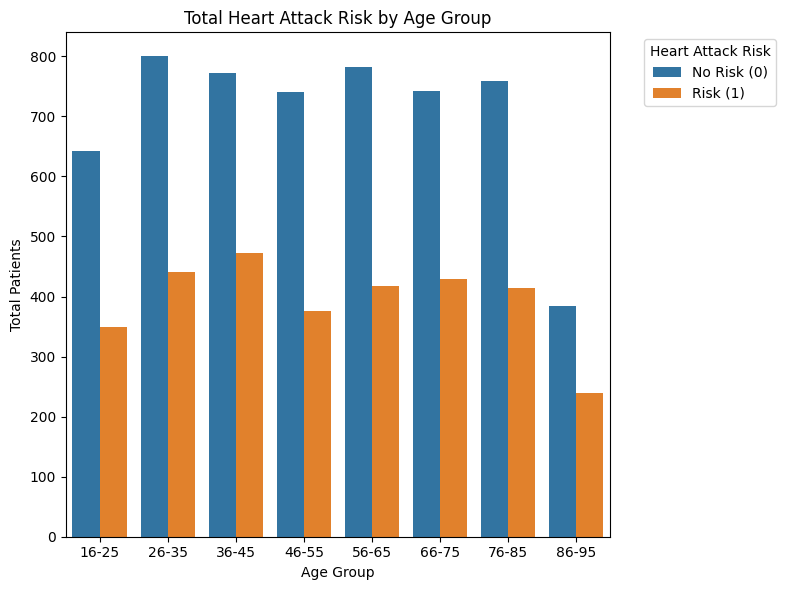

In [453]:
heart_attack_df["Age_Group"] = pd.cut(
    heart_attack_df["Age"],
    bins = [16, 25, 35, 45, 55, 65, 75, 85, 95],
    labels = ["16-25", '26-35', "36-45", "46-55", "56-65", "66-75", "76-85", "86-95"]
)

plt.figure(figsize = (8, 6))
sns.countplot(
    data=heart_attack_df,
    x="Age_Group",
    hue="Heart Attack Risk"
)

plt.title("Total Heart Attack Risk by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Patients")
plt.legend(
    title="Heart Attack Risk",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    labels = ["No Risk (0)", "Risk (1)"]
)
plt.tight_layout()
plt.show()

**Conclusion:**

Based on the visualization of total patient counts across different age groups, the number of patients with no heart attack risk remains higher than those with heart attack risk in all age categories. This suggests that, overall, individuals without serious heart conditions still make up the majority of the population, particularly in younger to middle-aged age groups.

Although an increase in the number of patients at risk of heart attacks is observed in the 36–45 age group, indicating that the accumulation of risk factors may begin at this stage of life, the hypothesis that heart disease risk consistently increases with age cannot be fully accepted. In the subsequent age groups, the number of at-risk patients does not show a steady upward trend reminded. A noticeable decline appears in the 86–95 age group, which is likely influenced by the smaller total number of patients in this oldest age range.

**Is there a difference in heart attack risk between men and women across different age groups?**

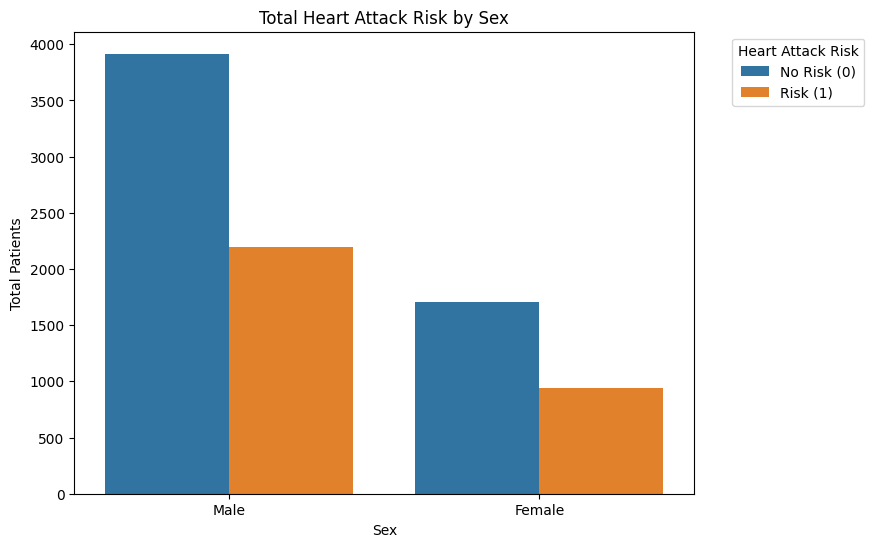

In [454]:
plt.figure(figsize = (8, 6))
sns.countplot(
    data = heart_attack_df,
    x = "Sex",
    hue = "Heart Attack Risk"
)

plt.title("Total Heart Attack Risk by Sex")
plt.xlabel("Sex")
plt.ylabel("Total Patients")
plt.legend(
    title = "Heart Attack Risk",
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (1)"]
)
plt.show()

**Conclusion:**

The hypothesis that men tend to have a higher risk of heart attacks than women is accepted. Based on the visualization, the number of heart attack cases is higher among male patients compared to female patients. This may occur because men are more likely to be exposed to certain risk factors at an earlier age, such as smoking, higher stress levels, and less healthy lifestyle habits. In addition, hormonal differences may also play a role, as estrogen in women is believed to provide some protection against heart disease.

**How are cholesterol levels related to heart attack risk?**

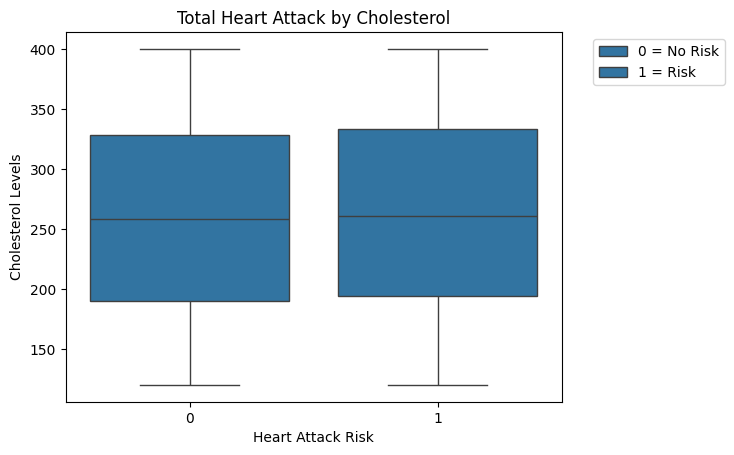

In [455]:
sns.boxplot(
    data = heart_attack_df,
    x = "Heart Attack Risk",
    y = "Cholesterol"
)

plt.title("Total Heart Attack by Cholesterol")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Cholesterol Levels")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["0 = No Risk", "1 = Risk"]
    )
plt.show()

**Conclusion:**

Based on the boxplot visualization, patients with heart attack risk (1) tend to have slightly higher cholesterol levels compared to patients with no heart attack risk (0). The median cholesterol level in the risk group is marginally higher, and the overall distribution of cholesterol values is shifted upward.

Although there is some overlap between the two groups, the visualization suggests a positive association between higher cholesterol levels and heart attack risk. Therefore, the hypothesis that higher cholesterol levels are associated with a higher risk of heart attacks is supported by the data.

**Does higher blood pressure increase the likelihood of heart disease?**

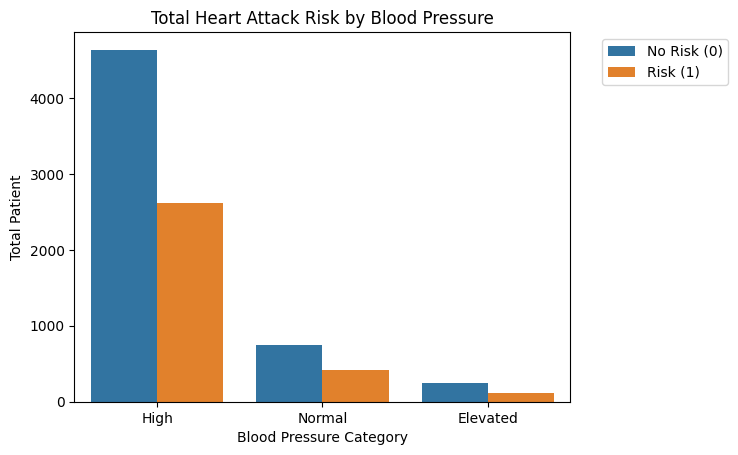

In [456]:
def bp_category(row):
  if row["Systolic_BP"] < 120 and row["Diastolic_BP"] < 80:
    return "Normal"
  elif 120 <= row["Systolic_BP"] < 130 and row["Diastolic_BP"] < 80:
    return "Elevated"
  else:
    return "High"

heart_attack_df["bp_category"] = heart_attack_df.apply(bp_category, axis = 1)

sns.countplot(
    data = heart_attack_df,
    x = "bp_category",
    hue = "Heart Attack Risk"
)

plt.title("Total Heart Attack Risk by Blood Pressure")
plt.xlabel("Blood Pressure Category")
plt.ylabel("Total Patient")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (1)"]
)
plt.show()

**Conclusion:**

Patients in the high blood pressure category show the highest number of heart attack risk cases compared to those in the normal and elevated blood pressure categories. Although patients without heart attack risk are still more numerous across all categories, the proportion of patients with heart attack risk is noticeably higher among individuals with high blood pressure. This may occur because heart disease is influenced not only by blood pressure, but also by other factors.

Overall, this pattern suggests that hypertension is strongly associated with an increased risk of heart disease. Therefore, the hypothesis that high blood pressure is one of the main factors contributing to heart disease is supported by the data.

**Is a higher resting heart rate associated with an increased risk of heart attacks?**

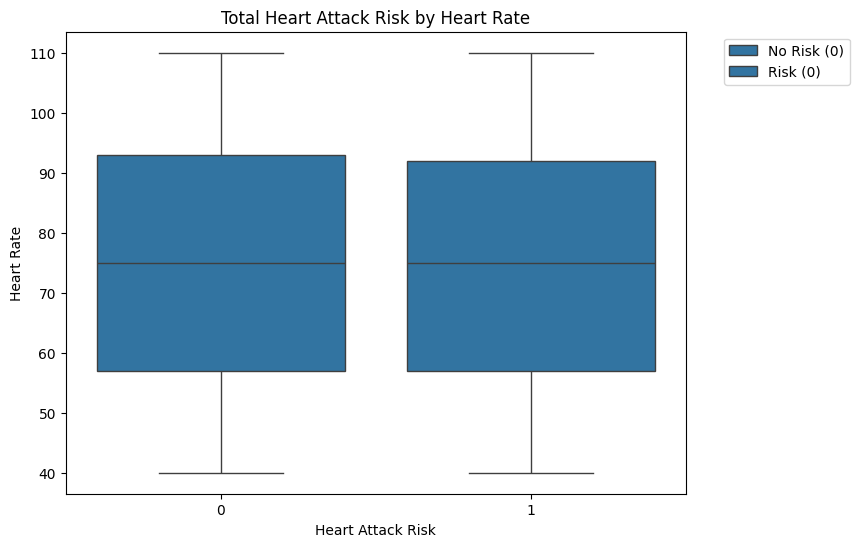

In [457]:
plt.figure(figsize = (8, 6))
sns.boxplot(
    data = heart_attack_df,
    x = "Heart Attack Risk",
    y = "Heart Rate"
)

plt.title("Total Heart Attack Risk by Heart Rate")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Heart Rate")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (0)"]
)
plt.show()

In [458]:
np.sort(heart_attack_df["Heart Rate"].unique())

array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110])

**Conclusion:**

From the boxplot, we can see that the resting heart rate for patients with heart attack risk (1) and those without risk (0) looks very similar. Most heart rates in the dataset are between 40 and 110 bpm, and the ranges for both groups overlap a lot. This means that in this dataset, a higher heart rate doesn’t clearly show a higher risk of heart attack.

However, in real-life situations, a consistently high resting heart rate can still be a warning sign for heart problems, especially when combined with other risk factors like high blood pressure, high cholesterol, or diabetes. So while the dataset doesn’t show a strong link, heart rate should not be ignored in practice.

**Do people with diabetes have a higher heart attack risk compared to those without diabetes?**

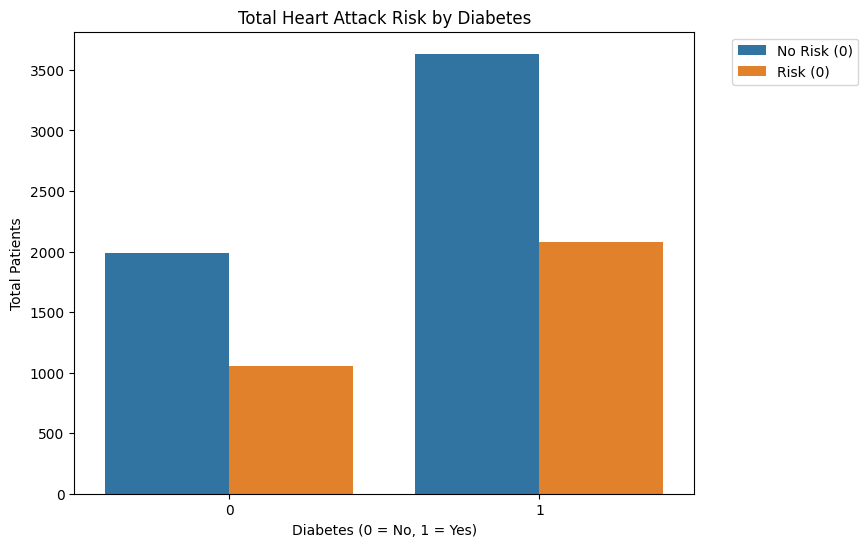

In [459]:
plt.figure(figsize = (8, 6))
sns.countplot(
    data = heart_attack_df,
    x = "Diabetes",
    hue = "Heart Attack Risk"
)

plt.title("Total Heart Attack Risk by Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Total Patients")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (0)"]
)
plt.show()

**Conclusion:**

Patients with a history of diabetes have a higher risk of having a heart attack compared to patients without diabetes. This supports my hypothesis that people with diabetes are more likely to experience a heart attack. The higher risk of heart attack in patients with diabetes is because diabetes can damage blood vessels and affect how the heart works, making it easier for heart problems to develop.

**How does a history of heart problems affect the risk of future heart attacks?**

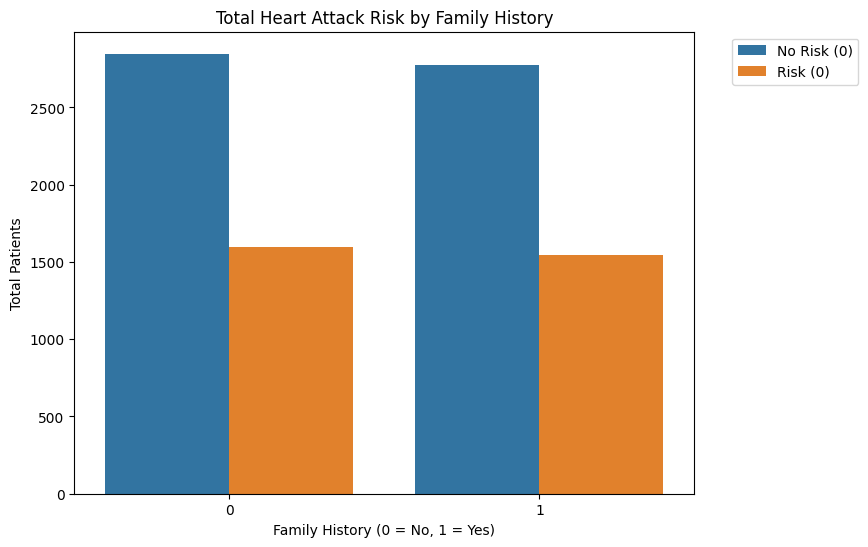

In [460]:
plt.figure(figsize = (8, 6))
sns.countplot(
    data = heart_attack_df,
    x = "Family History",
    hue = "Heart Attack Risk"
)

plt.title("Total Heart Attack Risk by Family History")
plt.xlabel("Family History (0 = No, 1 = Yes)")
plt.ylabel("Total Patients")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (0)"]
)
plt.show()

**Conclusion:**

Based on the visualization, individuals without a family history of heart disease show a slightly higher number of heart attack cases compared to those with a family history. However, the difference between the two groups is small. This indicates that family history alone may not be a strong predictor of heart attack risk, and other factors are likely to play a more important role.

**How do smoking and alcohol consumption influence heart attack risk?**

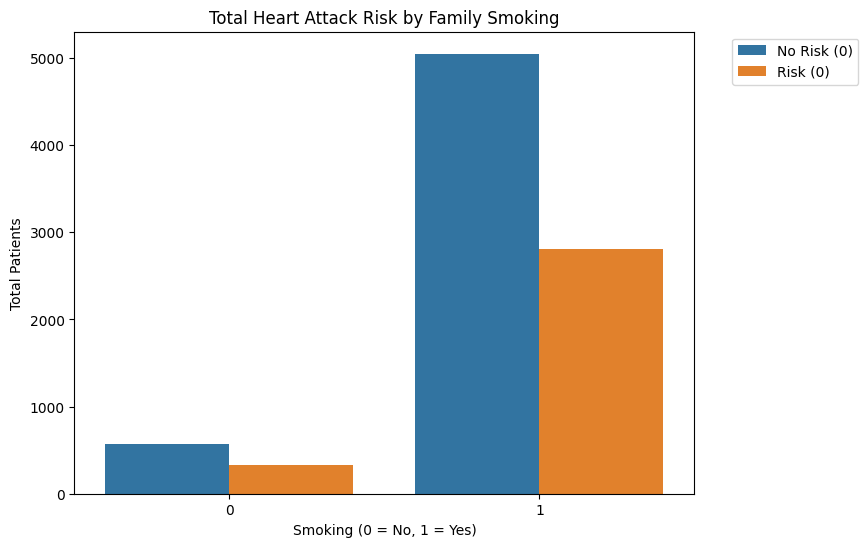

In [461]:
plt.figure(figsize = (8, 6))
sns.countplot(
    data = heart_attack_df,
    x = "Smoking",
    hue = "Heart Attack Risk"
)

plt.title("Total Heart Attack Risk by Family Smoking")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Total Patients")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (0)"]
)
plt.show()

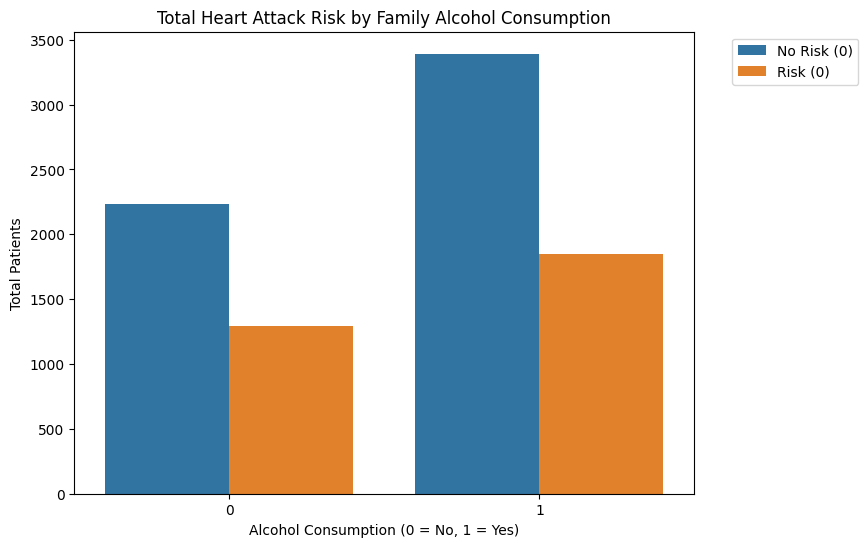

In [462]:
plt.figure(figsize = (8, 6))
sns.countplot(
    data = heart_attack_df,
    x = "Alcohol Consumption",
    hue = "Heart Attack Risk"
)

plt.title("Total Heart Attack Risk by Family Alcohol Consumption")
plt.xlabel("Alcohol Consumption (0 = No, 1 = Yes)")
plt.ylabel("Total Patients")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (0)"]
)
plt.show()

**Conclusion:**

Both visualizations support the hypothesis that smoking and alcohol consumption increase the risk of heart attacks. There is a clear and significant difference in the number of patients with heart attack risk between individuals who smoke and consume alcohol and those who do not. This indicates that smoking and alcohol consumption are important risk factors that strongly contribute to an increased likelihood of heart attacks.

**Does increased physical activity, such as more exercise hours and active days per week, reduce heart attack risk?**

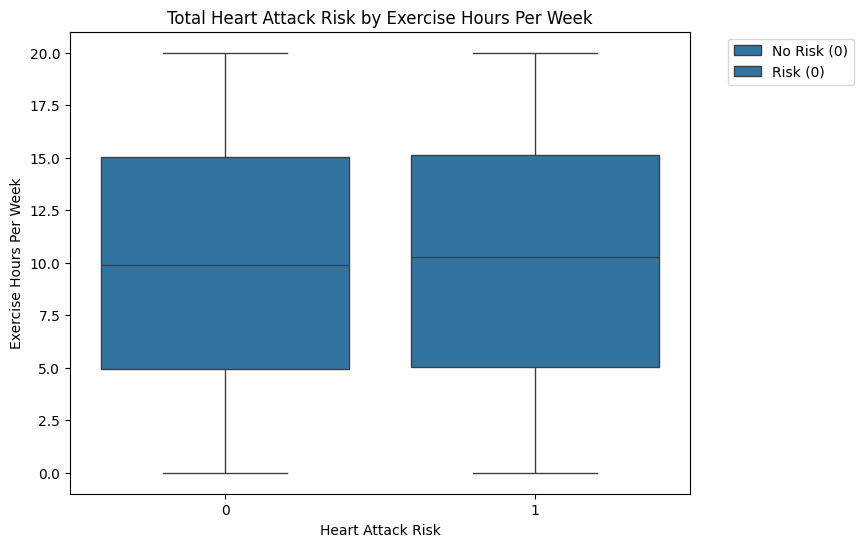

In [463]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data = heart_attack_df,
    x = 'Heart Attack Risk',
    y = 'Exercise Hours Per Week'
)

plt.title("Total Heart Attack Risk by Exercise Hours Per Week")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Exercise Hours Per Week")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (0)"]
)
plt.show()

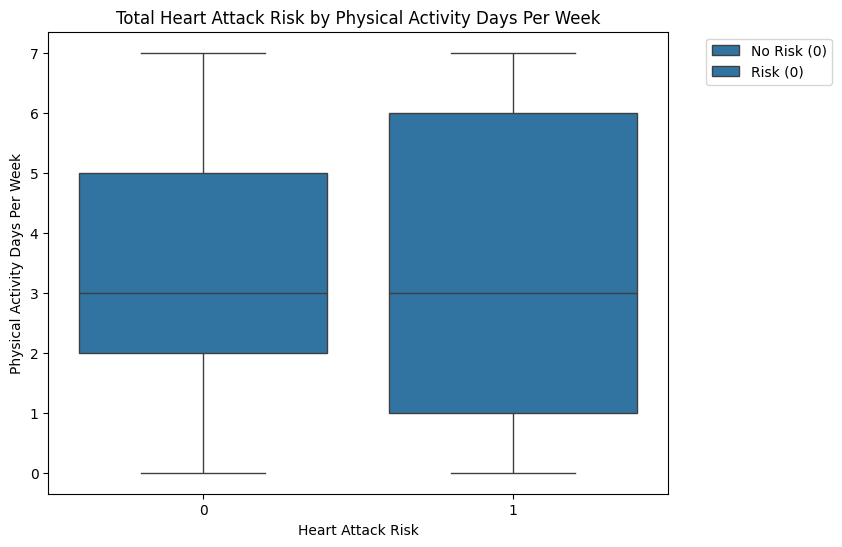

In [464]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data = heart_attack_df,
    x = 'Heart Attack Risk',
    y = 'Physical Activity Days Per Week'
)

plt.title("Total Heart Attack Risk by Physical Activity Days Per Week")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Physical Activity Days Per Week")
plt.legend(
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    labels = ["No Risk (0)", "Risk (0)"]
)
plt.show()

**Conclusion:**

Based on the boxplots, there is no clear difference in exercise hours per week or physical activity days per week between individuals with and without heart attack risk. The medians and data distributions for both groups are very similar and overlap significantly. This suggests that, based on this visualization, increased physical activity does not show a strong or clear association with reduced heart attack risk.

**How do sleep duration and stress levels together influence heart attack risk?**

In [465]:
heart_attack_df["Stress Level"].unique()

array([ 9,  1,  6,  2,  7,  4,  5,  8, 10,  3])

/tmp/ipython-input-831099052.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Sleep Category', 'Heart Attack Risk'])['Stress Level']


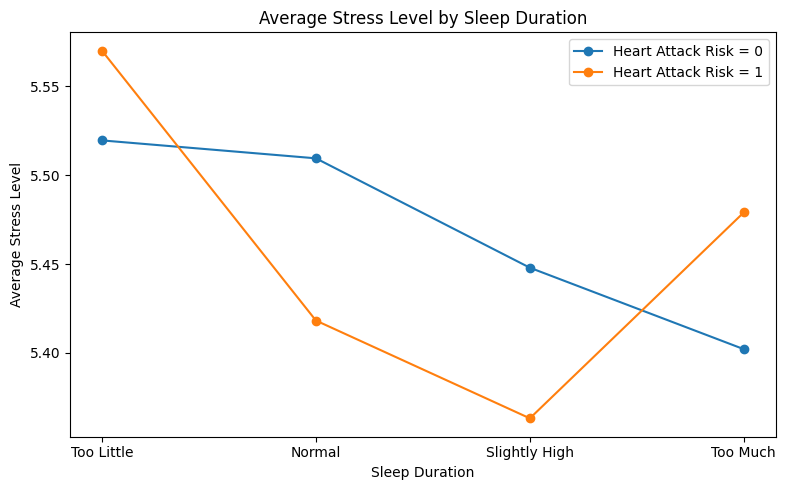

In [466]:
heart_attack_df['Sleep Category'] = pd.cut(
    heart_attack_df['Sleep Hours Per Day'],
    bins=[0, 5, 7, 9, 24],
    labels=['Too Little', 'Normal', 'Slightly High', 'Too Much']
)

sleep_category_grouped = (
    heart_attack_df
    .groupby(['Sleep Category', 'Heart Attack Risk'])['Stress Level']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
for risk in [0, 1]:
    subset = sleep_category_grouped[sleep_category_grouped['Heart Attack Risk'] == risk]
    plt.plot(
        subset['Sleep Category'],
        subset['Stress Level'],
        marker = 'o',
        label = f'Heart Attack Risk = {risk}'
    )

plt.title('Average Stress Level by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Average Stress Level')
plt.legend()
plt.tight_layout()
plt.show()


**Conclusion:**

The visualization shows that stress levels tend to be higher when sleep duration is too short or too long, especially among individuals with heart attack risk. In contrast, people who get a moderate amount of sleep (normal to slightly high) generally have lower average stress levels. This supports the hypothesis that getting enough sleep neither too little nor too much can help reduce stress, which may indirectly lower the risk of heart attacks.

**How does a high BMI, as an indicator of obesity, relate to heart attack risk?**

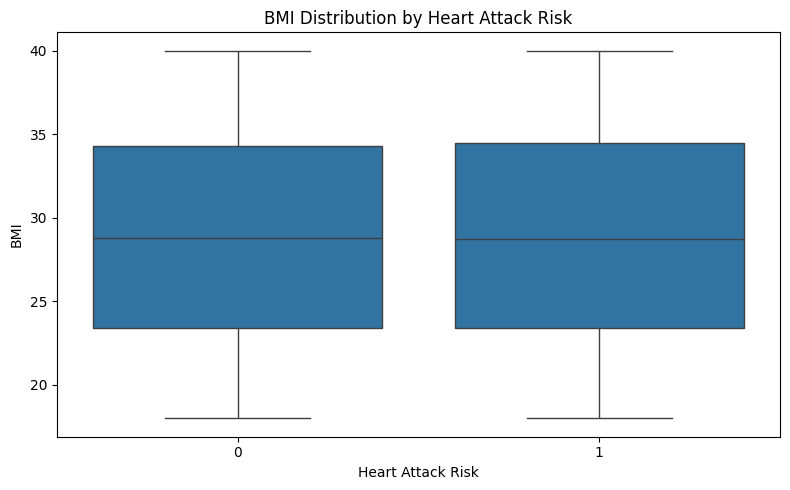

In [467]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=heart_attack_df,
    x="Heart Attack Risk",
    y="BMI",
)

plt.title("BMI Distribution by Heart Attack Risk")
plt.xlabel("Heart Attack Risk")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()


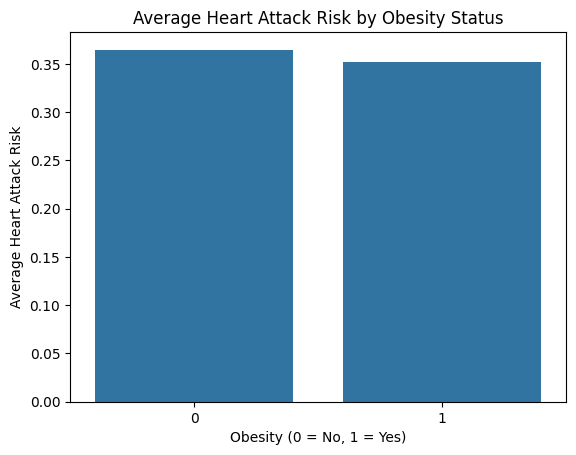

In [468]:
risk_by_obesity = (
    heart_attack_df
    .groupby("Obesity")["Heart Attack Risk"]
    .mean()
    .reset_index()
)

sns.barplot(
    data=risk_by_obesity,
    x="Obesity",
    y="Heart Attack Risk"
)

plt.title("Average Heart Attack Risk by Obesity Status")
plt.xlabel("Obesity (0 = No, 1 = Yes)")
plt.ylabel("Average Heart Attack Risk")
plt.show()

**Conclusion:**

Based on both visualizations, the hypothesis that a high BMI, as an indicator of obesity caused by unhealthy eating habits, increases the risk of heart attacks is not supported by the data. The results show no significant difference in heart attack risk between individuals with higher and lower BMI values. However, in real-life conditions, obesity may still be one of the contributing factors to heart attack risk when combined with other health and lifestyle factors.

In [469]:
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Patient ID                       8763 non-null   object  
 1   Age                              8763 non-null   int64   
 2   Sex                              8763 non-null   object  
 3   Cholesterol                      8763 non-null   int64   
 4   Heart Rate                       8763 non-null   int64   
 5   Diabetes                         8763 non-null   int64   
 6   Family History                   8763 non-null   int64   
 7   Smoking                          8763 non-null   int64   
 8   Obesity                          8763 non-null   int64   
 9   Alcohol Consumption              8763 non-null   int64   
 10  Exercise Hours Per Week          8763 non-null   float64 
 11  Diet                             8763 non-null   object  
 12  Previo

In [470]:
heart_attack_df["Continent"].nunique()

6

**Which countries have the highest number of heart attack cases in the dataset?**

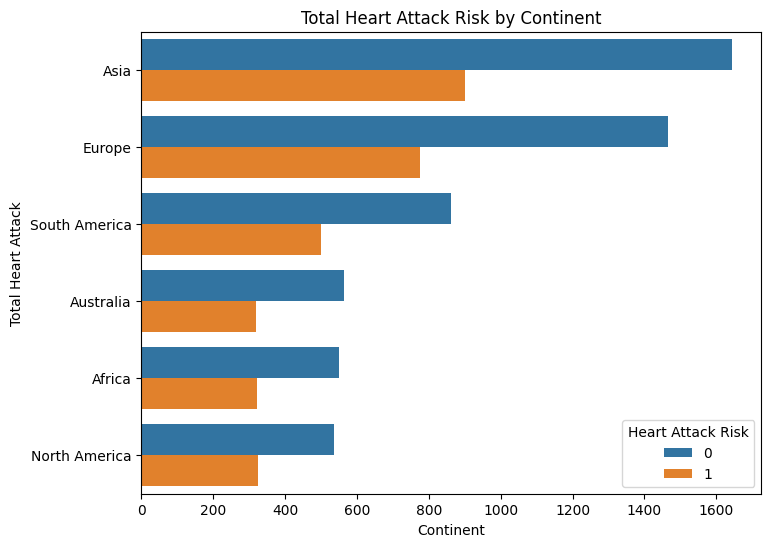

In [471]:
plt.figure(figsize = (8, 6))
sns.countplot(
    data = heart_attack_df,
    y = "Continent",
    hue = "Heart Attack Risk",
    order = heart_attack_df["Continent"].value_counts().index
)

plt.title("Total Heart Attack Risk by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Heart Attack")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

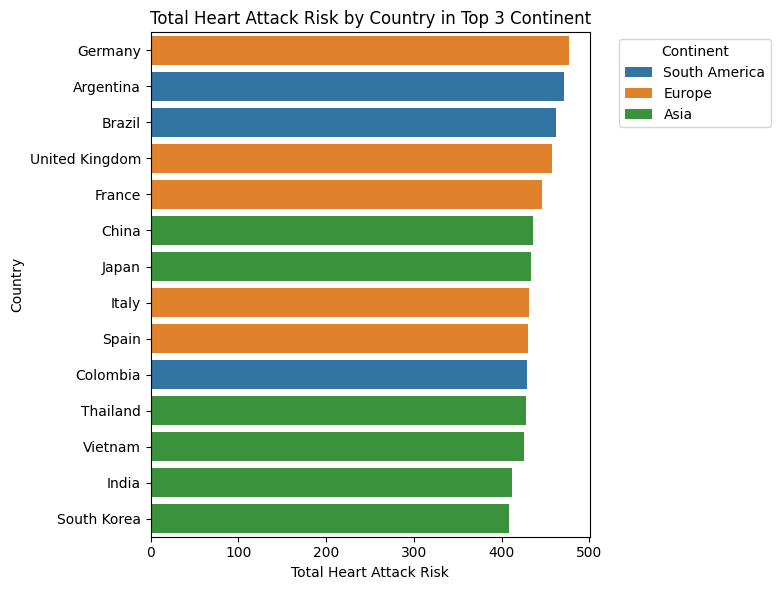

In [472]:
top_3_continent = heart_attack_df["Continent"].value_counts().nlargest(3).index
filtered_df = heart_attack_df[heart_attack_df["Continent"].isin(top_3_continent)]

plt.figure(figsize = (8, 6))
sns.countplot(
    data = filtered_df,
    y = "Country",
    hue = "Continent",
    order = filtered_df["Country"].value_counts().index
)

plt.title("Total Heart Attack Risk by Country in Top 3 Continent")
plt.xlabel("Total Heart Attack Risk")
plt.ylabel("Country")
plt.legend(
    title = "Continent",
    bbox_to_anchor = (1.05, 1),
    loc = "upper left"
)
plt.tight_layout()
plt.show

**Conclusion:**

The analysis shows that Asia has the highest total heart attack risk when compared to other continents. This is likely because Asia includes many countries, and the combined risk from all these countries results in a higher total value. North America has the lowest total heart attack risk, which may be influenced by a smaller number of high-risk cases in the dataset. Further analysis at the country level reveals that Germany has the highest total heart attack risk among individual countries. This does not contradict the continent-level result, as Asia’s higher total risk comes from the accumulation of multiple countries rather than a single country with the highest risk.

**FINAL CONCLUSION:**

Based on the overall data analysis, heart attack risk is influenced by multiple factors rather than a single variable. Demographic factors such as gender show a clear pattern, where men have a higher heart attack risk than women. Age alone does not consistently increase risk, although early middle age (36–45) appears to be a stage where risk factors start to accumulate.

Several medical and lifestyle factors are strongly associated with heart attack risk. High blood pressure, diabetes, smoking, and alcohol consumption show a clear relationship with increased risk and can be considered major contributing factors. High cholesterol also shows a positive association, although the difference is relatively small. On the other hand, resting heart rate, physical activity levels, BMI, and family history do not show a strong or clear relationship with heart attack risk in this dataset, even though some of these factors are known to be important in real-life medical contexts.

Sleep patterns show an indirect effect, where too little or too much sleep is associated with higher stress levels, which may contribute to heart attack risk. From a geographical perspective, Asia has the highest total heart attack risk at the continent level due to the combined contribution of many countries, while Germany has the highest total risk at the country level, highlighting the difference between aggregated and individual-level analysis.

Overall, this analysis suggests that heart attack risk is best understood as the result of a combination of medical conditions and lifestyle behaviors, rather than isolated factors alone.


## **MACHINE LEARNING**

In [473]:
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Patient ID                       8763 non-null   object  
 1   Age                              8763 non-null   int64   
 2   Sex                              8763 non-null   object  
 3   Cholesterol                      8763 non-null   int64   
 4   Heart Rate                       8763 non-null   int64   
 5   Diabetes                         8763 non-null   int64   
 6   Family History                   8763 non-null   int64   
 7   Smoking                          8763 non-null   int64   
 8   Obesity                          8763 non-null   int64   
 9   Alcohol Consumption              8763 non-null   int64   
 10  Exercise Hours Per Week          8763 non-null   float64 
 11  Diet                             8763 non-null   object  
 12  Previo

In [474]:
X = heart_attack_df.drop(columns = ["Patient ID","Heart Attack Risk", "Age_Group", "bp_category", "Sleep Category"])
y = heart_attack_df["Heart Attack Risk"]

In [475]:
categorical_features = [
    "Sex",
    "Diet",
    "Country",
    "Continent",
    "Hemisphere"
]

numerical_features = [
    "Age",
    "Cholesterol",
    "Heart Rate",
    "Diabetes",
    "Family History",
    "Smoking",
    "Obesity",
    "Alcohol Consumption",
    "Exercise Hours Per Week",
    "Previous Heart Problems",
    "Medication Use",
    "Stress Level",
    "Sedentary Hours Per Day",
    "Income",
    "BMI",
    "Triglycerides",
    "Physical Activity Days Per Week",
    "Sleep Hours Per Day",
    "Systolic_BP",
    "Diastolic_BP"
]

In [476]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers = [
        ("numerical", StandardScaler(), numerical_features),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_features)
    ]
)

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# **RANDOM FOREST**

In [478]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42,
    class_weight = "balanced"
)

In [479]:
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", rf)
])

In [480]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Age', 'Cholesterol',
                                                   'Heart Rate', 'Diabetes',
                                                   'Family History', 'Smoking',
                                                   'Obesity',
                                                   'Alcohol Consumption',
                                                   'Exercise Hours Per Week',
                                                   'Previous Heart Problems',
                                                   'Medication Use',
                                                   'Stress Level',
                                                   'Sedentary Hours Per Day',
                                                   'Income', 'BMI',
                                                   'Triglycerides',
                                                   'Physical Activity Days Per '
                                                   'Week',
                                                   'Sleep Hours Per Day',
                                                   'Systolic_BP',
                                                   'Diastolic_BP']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Diet', 'Country',
                                                   'Continent',
                                                   'Hemisphere'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [481]:
y_pred_rf = pipeline_rf.predict(X_test)
y_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]

In [482]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [483]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("Recall Score: ", recall_score(y_test, y_pred_rf))
print("Precision Score: ", precision_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))
print("ROC AUC Score: ", roc_auc_score(y_test, y_proba_rf))

Accuracy Score:  0.6432103461392165
Recall Score:  0.010660980810234541
Precision Score:  0.5
F1 Score:  0.020876826722338204
ROC AUC Score:  0.5105815435788869


In [484]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[1681,   10],
       [ 928,   10]])

In [485]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1691
           1       0.50      0.01      0.02       938

    accuracy                           0.64      2629
   macro avg       0.57      0.50      0.40      2629
weighted avg       0.59      0.64      0.51      2629



In [486]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 1, 3, 5],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv = 5,
    scoring = "recall",
    n_jobs = -1
)

grid_search_rf.fit(X_train, y_train)

best_param_rf = grid_search_rf.best_params_
print("Best Parameters: ", best_param_rf)

Best Parameters:  {'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}


In [487]:
best_model_rf = grid_search_rf.best_estimator_
y_best_pred_rf = best_model_rf.predict(X_test)
y_best_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]

print("Recall (Tuned): ", roc_auc_score(y_test, y_best_pred_rf))
print(classification_report(y_test, y_best_pred_rf))

Recall (Tuned):  0.5064533293656748
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      1691
           1       0.36      0.47      0.41       938

    accuracy                           0.52      2629
   macro avg       0.51      0.51      0.50      2629
weighted avg       0.55      0.52      0.53      2629



In [488]:
cm = confusion_matrix(y_test, y_best_pred_rf)
cm

array([[916, 775],
       [496, 442]])

# **LOGISTIC REGRESSION**

In [489]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(
    max_iter=2000,
    random_state = 42,
    class_weight = {0:1, 1:2}
)

In [490]:
pipeline_logreg = Pipeline(steps = [
    ("preprocessing", preprocessor),
    ("model", logreg)
])

In [491]:
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Age', 'Cholesterol',
                                                   'Heart Rate', 'Diabetes',
                                                   'Family History', 'Smoking',
                                                   'Obesity',
                                                   'Alcohol Consumption',
                                                   'Exercise Hours Per Week',
                                                   'Previous Heart Problems',
                                                   'Medication Use',
                                                   'Stress Level',
                                                   'Sedentary Hours Per Day',
                                                   'Income', 'BMI',
                                                   'Triglycerides',
                                                   'Physical Activity Days Per '
                                                   'Week',
                                                   'Sleep Hours Per Day',
                                                   'Systolic_BP',
                                                   'Diastolic_BP']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Diet', 'Country',
                                                   'Continent',
                                                   'Hemisphere'])])),
                ('model',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=2000,
                                    random_state=42))])

In [492]:
# y_pred_logreg = pipeline_logreg.predict(X_test)
y_proba_logreg = pipeline_logreg.predict_proba(X_test)[:, 1]
y_pred_logreg = (y_proba_logreg >= 0.3).astype(int)

In [493]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_logreg))
print("Recall Score: ", recall_score(y_test, y_pred_logreg))
print("Precision Score: ", precision_score(y_test, y_pred_logreg))
print("F1 Score: ", f1_score(y_test, y_pred_logreg))
print("ROC AUC Score: ", roc_auc_score(y_test, y_proba_logreg))

Accuracy Score:  0.3567896538607836
Recall Score:  1.0
Precision Score:  0.3567896538607836
F1 Score:  0.5259321558732829
ROC AUC Score:  0.49904927504069585


In [494]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg

array([[   0, 1691],
       [   0,  938]])

In [495]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1691
           1       0.36      1.00      0.53       938

    accuracy                           0.36      2629
   macro avg       0.18      0.50      0.26      2629
weighted avg       0.13      0.36      0.19      2629



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [496]:
grid_param_logreg = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
    "model__solver": ["liblinear"],
}

grid_search_logreg = GridSearchCV(
    pipeline_logreg,
    grid_param_logreg,
    cv = 5,
    scoring = "recall",
    n_jobs = -1
)

grid_search_logreg.fit(X_train, y_train)

best_param_logreg = grid_search_logreg.best_params_
print("Best Parameter: ", best_param_logreg)

Best Parameter:  {'model__C': 0.01, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [497]:
best_model_logreg = grid_search_logreg.best_estimator_

# y_best_pred_logreg = best_model_logreg.predict(X_test)
y_best_proba_logreg = best_model_logreg.predict_proba(X_test)[:, 1]
y_best_pred_logreg = (y_best_proba_logreg >= 0.3).astype(int)

print("F1 Score (Tuned): ", roc_auc_score(y_test, y_best_pred_logreg))
print(classification_report(y_test, y_best_pred_logreg))

F1 Score (Tuned):  0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1691
           1       0.36      1.00      0.53       938

    accuracy                           0.36      2629
   macro avg       0.18      0.50      0.26      2629
weighted avg       0.13      0.36      0.19      2629



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [534]:
cm_best_logreg = confusion_matrix(y_test, y_best_pred_logreg)
cm_best_logreg

array([[   0, 1691],
       [   0,  938]])

## **GRADIENT BOOSTING**

In [516]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8
)

In [517]:
pipeline_gb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", gb)
])

In [518]:
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Age', 'Cholesterol',
                                                   'Heart Rate', 'Diabetes',
                                                   'Family History', 'Smoking',
                                                   'Obesity',
                                                   'Alcohol Consumption',
                                                   'Exercise Hours Per Week',
                                                   'Previous Heart Problems',
                                                   'Medication Use',
                                                   'Stress Level',
                                                   'Sedentary Hours Per Day',
                                                   'Income', 'BMI',
                                                   'Triglycerides',
                                                   'Physical Activity Days Per '
                                                   'Week',
                                                   'Sleep Hours Per Day',
                                                   'Systolic_BP',
                                                   'Diastolic_BP']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Diet', 'Country',
                                                   'Continent',
                                                   'Hemisphere'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200, random_state=42,
                                            subsample=0.8))])

In [519]:
y_pred_gb = pipeline_gb.predict(X_test)
y_proba_gb = pipeline_gb.predict_proba(X_test)[:, 1]

In [520]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_gb))
print("Recall Score: ", recall_score(y_test, y_pred_gb))
print("Precision Score: ", precision_score(y_test, y_pred_gb))
print("F1 Score: ", f1_score(y_test, y_pred_gb))
print("ROC AUC Score: ", roc_auc_score(y_test, y_proba_gb))

Accuracy Score:  0.6386458729554964
Recall Score:  0.014925373134328358
Precision Score:  0.35
F1 Score:  0.028629856850715747
ROC AUC Score:  0.5064318939222953


In [521]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
cm_gb

array([[1665,   26],
       [ 924,   14]])

In [522]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1691
           1       0.35      0.01      0.03       938

    accuracy                           0.64      2629
   macro avg       0.50      0.50      0.40      2629
weighted avg       0.54      0.64      0.51      2629



In [523]:
grid_param_gb = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.01, 0.1, 1, 10],
    "model__max_depth": [2, 3, 4],
    "model__subsample": [0.8, 1.0]
}

grid_search_gb = GridSearchCV(
    pipeline_gb,
    grid_param_gb,
    cv = 5,
    scoring = "f1",
    n_jobs = -1
)

grid_search_gb.fit(X_train, y_train)

best_param_gb = grid_search_gb.best_params_
print("Best Pramaeter: ", best_param_gb)

Best Pramaeter:  {'model__learning_rate': 10, 'model__max_depth': 4, 'model__n_estimators': 100, 'model__subsample': 1.0}


In [531]:
best_model_gb = grid_search_gb.best_estimator_
y_best_pred_gb = best_model_gb.predict(X_test)
y_best_proba_gb = best_model_gb.predict_proba(X_test)[:, 1]

print("F1 Socre (tuned): ", f1_score(y_test, y_best_pred_gb))
print(classification_report(y_test, y_best_pred_gb))

F1 Socre (tuned):  0.5244143381315269
              precision    recall  f1-score   support

           0       0.62      0.01      0.02      1691
           1       0.36      0.99      0.52       938

    accuracy                           0.36      2629
   macro avg       0.49      0.50      0.27      2629
weighted avg       0.53      0.36      0.20      2629



In [529]:
best_cm_gb = confusion_matrix(y_test, y_best_pred_gb)
best_cm_gb

array([[  15, 1676],
       [   9,  929]])

In [505]:
new_df = pd.DataFrame({
    "Sex": ["Male"],
    "Diet": ["Unhealthy"],
    "Country": ["Indonesia"],
    "Continent": ["Asia"],
    "Hemisphere": ["Northern"],

    "Age": [55],
    "Cholesterol": [240],
    "Heart Rate": [92],
    "Diabetes": [1],
    "Family History": [1],
    "Smoking": [1],
    "Obesity": [1],
    "Alcohol Consumption": [2],
    "Exercise Hours Per Week": [1.5],
    "Previous Heart Problems": [1],
    "Medication Use": [1],
    "Stress Level": [8],
    "Sedentary Hours Per Day": [9],
    "Income": [5000],
    "BMI": [31.2],
    "Triglycerides": [210],
    "Physical Activity Days Per Week": [2],
    "Sleep Hours Per Day": [5.5],
    "Systolic_BP": [145],
    "Diastolic_BP": [95]
})

prediction = best_model_rf.predict(new_df)
probability= best_model_rf.predict_proba(new_df)[:, 1]

print("Predicted Class (0 = No Risk, 1 = Risk):", prediction[0])
print("Heart Attack Risk Probability:", probability[0])


Predicted Class (0 = No Risk, 1 = Risk): 0
Heart Attack Risk Probability: 0.47385358414322526


**Conclusion:**

In this study, three classification models Logistic Regression, Random Forest, and Gradient Boosting were evaluated to predict heart attack risk using an imbalanced dataset. The results show that Logistic Regression and Gradient Boosting achieved high recall for the positive class after tuning; however, this was accompanied by very low precision and accuracy, indicating that the models tended to predict most samples as positive cases. This behavior led to a high number of false positives.

Random Forest produced more balanced results, with moderate recall, precision, and accuracy across both classes. Although its overall performance was not high, it demonstrated a better trade-off between detecting positive cases and avoiding excessive false positives.

Overall, increasing model complexity and applying advanced tuning techniques did not lead to a significant improvement in predictive performance. This suggests that the limited performance is mainly influenced by the overlap of features between classes and the imbalance of the dataset, rather than the choice of classification algorithm. Therefore, Random Forest is considered the most stable model in this study, while the results highlight the importance of data quality and feature relevance for improving prediction performance.